# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | mirriah
Processing Record 6 of Set 1 | ust-tsilma
Processing Record 7 of Set 1 | island harbour
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | al jawf
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | lospalos
Processing Record 12 of Set 1 | livramento do brumado
Processing Record 13 of Set 1 | auki
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | ifrane
Processing Record 16 of Set 1 | magadan
Processing Record 17 of Set 1 | sesheke
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kudahuvadhoo,2.6708,72.8944,27.81,76,85,2.69,MV,1725308805
1,bethel,41.3712,-73.4140,24.74,59,18,0.89,US,1725308806
2,edinburgh of the seven seas,-37.0676,-12.3116,9.45,66,92,12.04,SH,1725308807
3,whitehorse,60.7161,-135.0538,15.61,54,75,2.57,CA,1725308809
4,mirriah,13.7073,9.1501,28.54,60,100,3.17,NE,1725308810


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kudahuvadhoo,2.6708,72.8944,27.81,76,85,2.69,MV,1725308805
1,bethel,41.3712,-73.4140,24.74,59,18,0.89,US,1725308806
2,edinburgh of the seven seas,-37.0676,-12.3116,9.45,66,92,12.04,SH,1725308807
3,whitehorse,60.7161,-135.0538,15.61,54,75,2.57,CA,1725308809
4,mirriah,13.7073,9.1501,28.54,60,100,3.17,NE,1725308810


In [14]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kudahuvadhoo,2.6708,72.8944,27.81,76,85,2.69,MV,2024-09-02
1,bethel,41.3712,-73.4140,24.74,59,18,0.89,US,2024-09-02
2,edinburgh of the seven seas,-37.0676,-12.3116,9.45,66,92,12.04,SH,2024-09-02
3,whitehorse,60.7161,-135.0538,15.61,54,75,2.57,CA,2024-09-02
4,mirriah,13.7073,9.1501,28.54,60,100,3.17,NE,2024-09-02


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

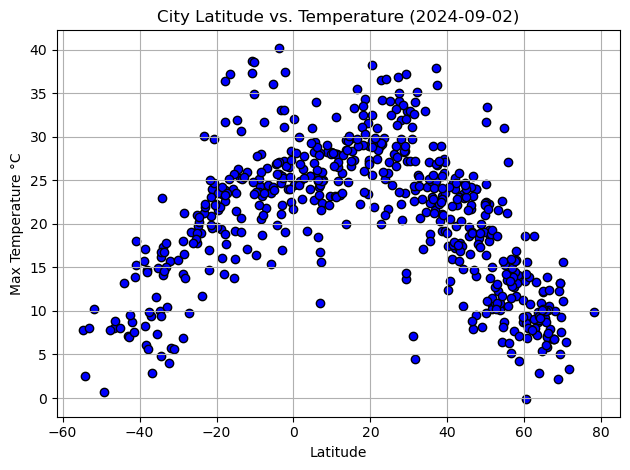

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

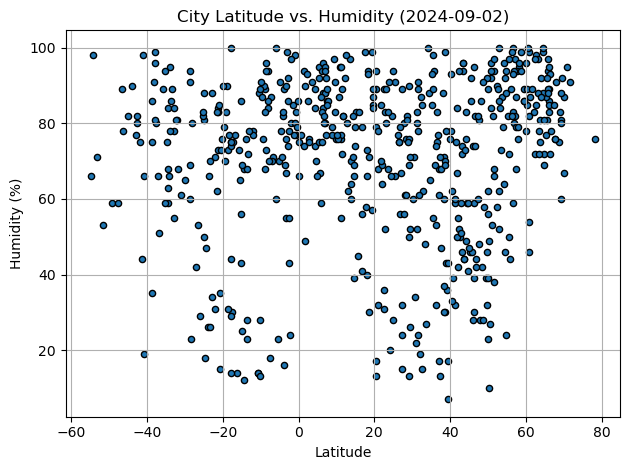

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

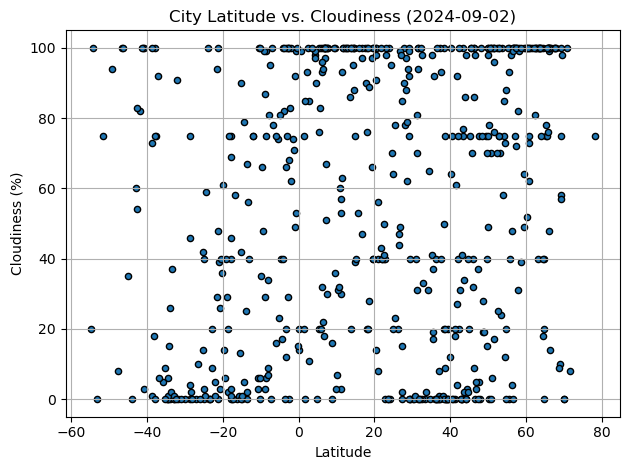

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

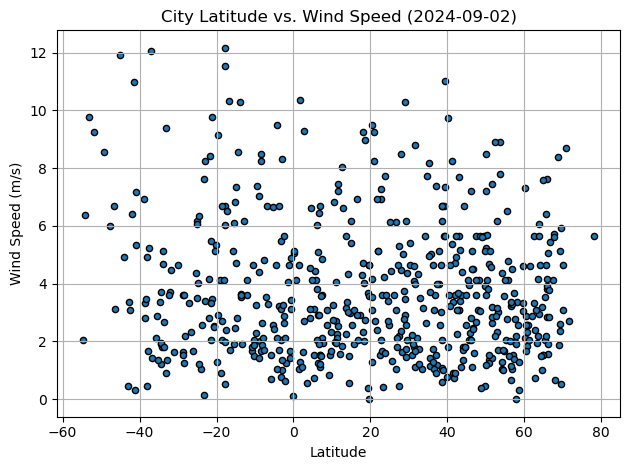

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/savirahiman/Desktop/Git_Hub_Repo/python-api-challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kudahuvadhoo,2.6708,72.8944,27.81,76,85,2.69,MV,2024-09-02
1,bethel,41.3712,-73.4140,24.74,59,18,0.89,US,2024-09-02
3,whitehorse,60.7161,-135.0538,15.61,54,75,2.57,CA,2024-09-02
4,mirriah,13.7073,9.1501,28.54,60,100,3.17,NE,2024-09-02
5,ust-tsilma,65.4410,52.1498,9.16,77,78,3.55,RU,2024-09-02


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,9.45,66,92,12.04,SH,2024-09-02
9,blackmans bay,-43.0167,147.3167,7.07,77,60,0.45,AU,2024-09-02
10,lospalos,-8.5186,127.0025,20.60,96,99,1.65,TL,2024-09-02
11,livramento do brumado,-13.6431,-41.8406,30.64,23,67,3.64,BR,2024-09-02
12,auki,-8.7676,160.7034,24.39,89,87,2.02,SB,2024-09-02


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7372968449389748


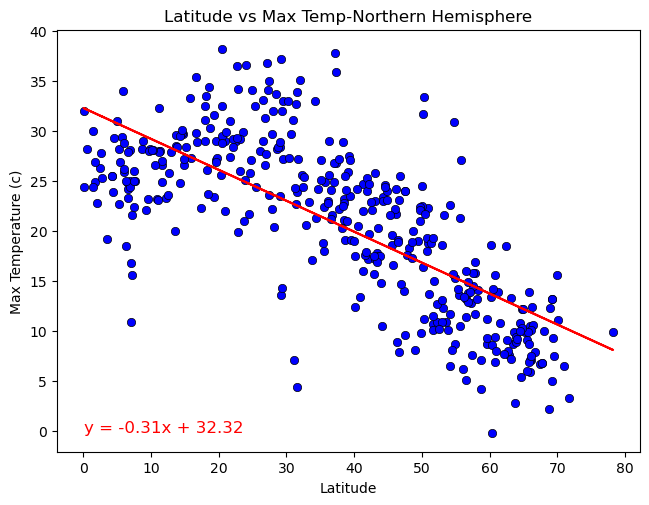

In [33]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f'Latitude vs Max Temp-Northern Hemisphere')
plt.show()

The r-value is: 0.7591542909134005


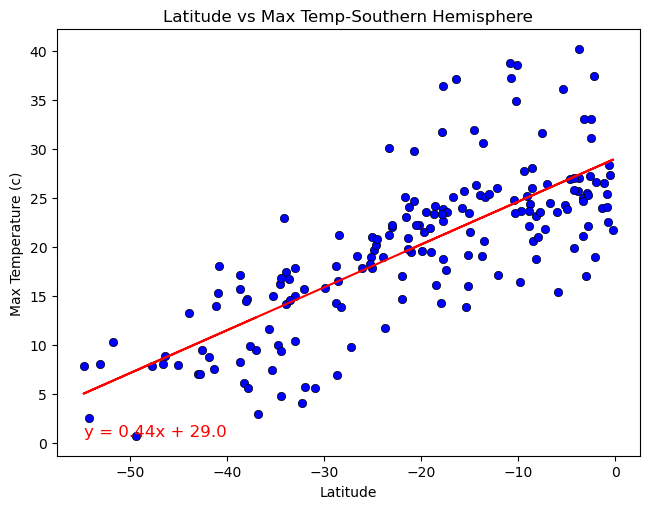

In [34]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f'Latitude vs Max Temp-Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation with a r-value of -0.7, while in the Southern Hemisphere, it is a positive correlation with a r-value of +0.7. In both it is as we expect - the maximum temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05155727650198891


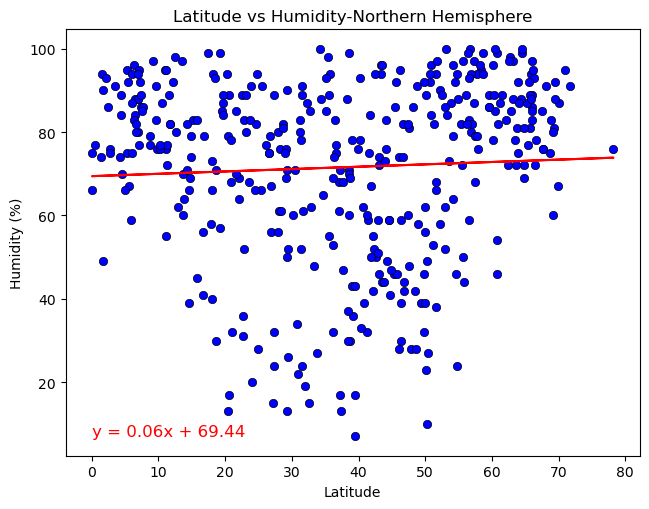

In [35]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Latitude vs Humidity-Northern Hemisphere')
plt.show()

The r-value is: -0.02196485921462893


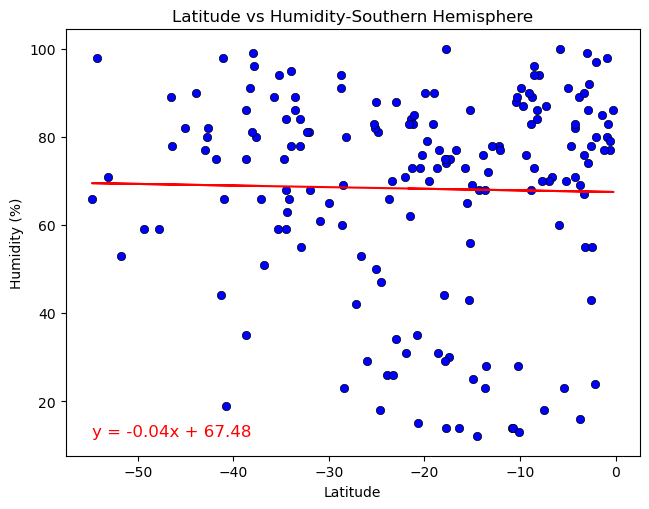

In [36]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Latitude vs Humidity-Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There is little correlation between Latitude and Humidity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity, however you can clearly see within the scatter plots for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels greater than 60%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04206702342084896


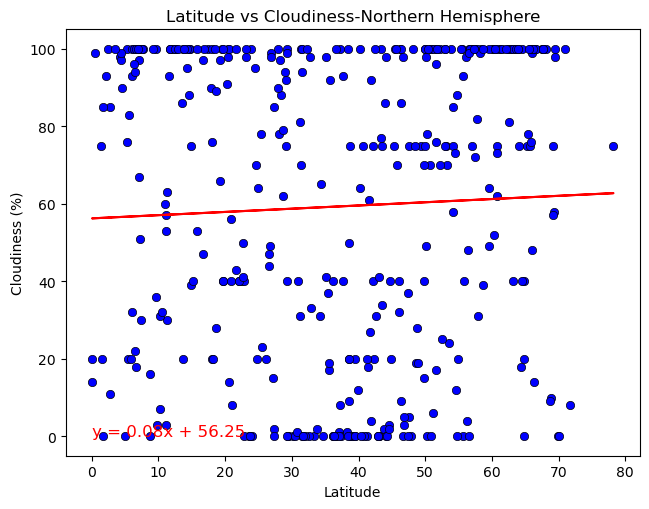

In [37]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Latitude vs Cloudiness-Northern Hemisphere')
plt.show()

The r-value is: 0.1545318951252611


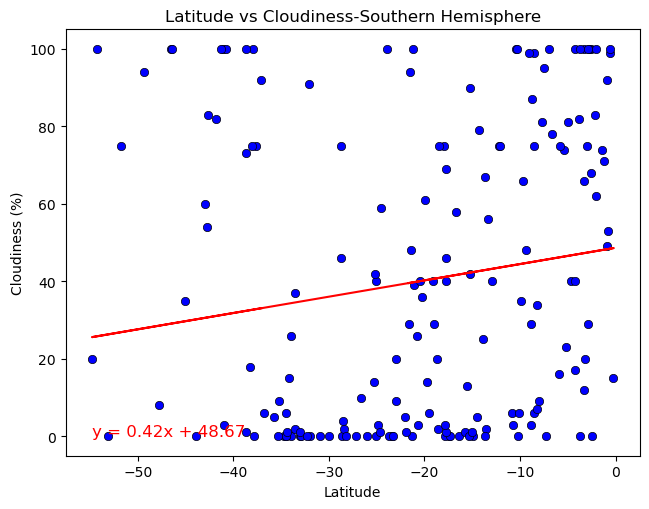

In [38]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Latitude vs Cloudiness-Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There is very little correlation between Cloudiness and a City's Latitude. The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than those of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.018440637159995367


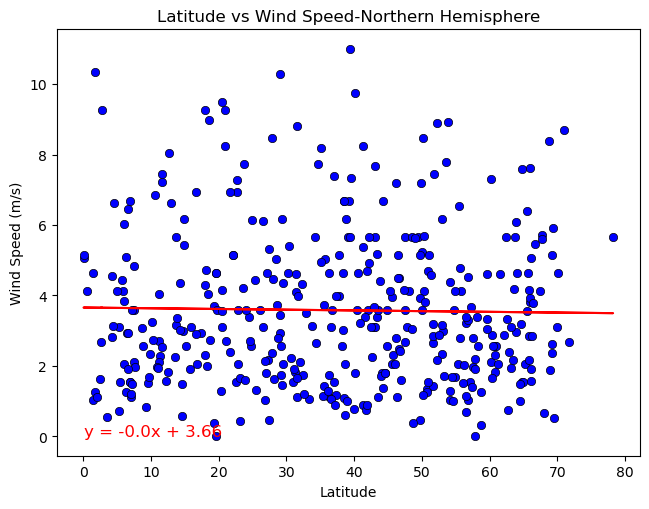

In [39]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'Latitude vs Wind Speed-Northern Hemisphere')
plt.show()

The r-value is: -0.15855781431485608


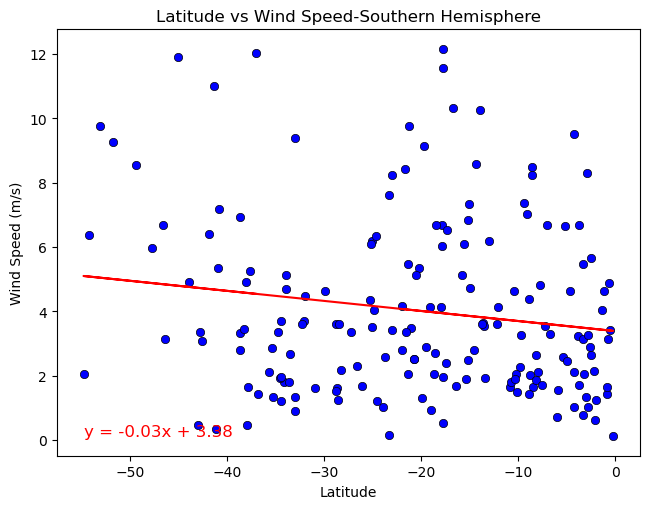

In [40]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'Latitude vs Wind Speed-Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There is little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.